In [23]:
import numpy as np

x = np.random.rand(100) * 20
real_alpha = 15
real_beta = 1
real_epsilon = 2

real_mu = x.mean()

y = np.array([np.random.randn() * np.sqrt(real_epsilon) + real_alpha + real_beta * x_ for x_ in x])

Pentru fiecare valoare din x, generam o valoare cu N(0, 1). Pentru a o aduce la N(alpha + beta * x, epsilon) inmultim valoarea cu sqrt(epsilon) si adunam noua medie.

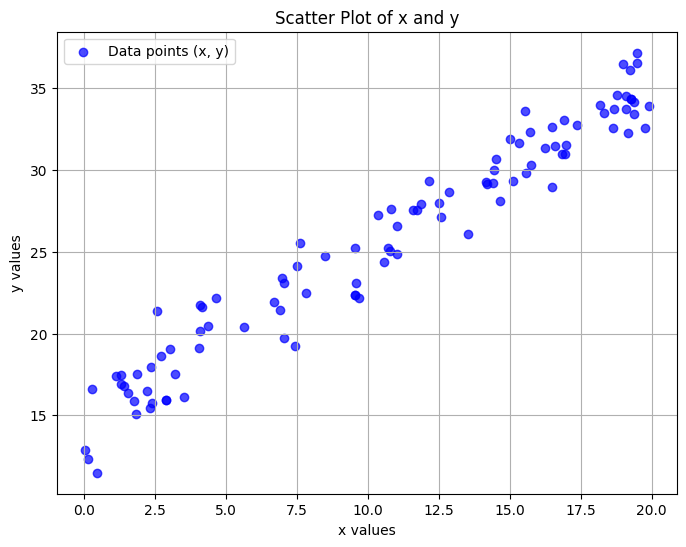

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data points (x, y)')
plt.title("Scatter Plot of x and y")
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import pymc as pm

with pm.Model() as model:
  alpha = pm.Normal('alpha', mu = 0, sigma = 10)
  beta = pm.Normal('beta', mu = 0, sigma = 1)
  epsilon = pm.HalfCauchy('epsilon', 5)
  mu = pm.Deterministic('mu', alpha + beta * x)
  y_pred = pm.Normal('y_pred', mu = mu, sigma = epsilon, observed = y)

  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)
  ppc = pm.sample_posterior_predictive(idata_g, var_names=['y_pred'], model=model)

Output()

Output()

Output()

1.5764375243884574


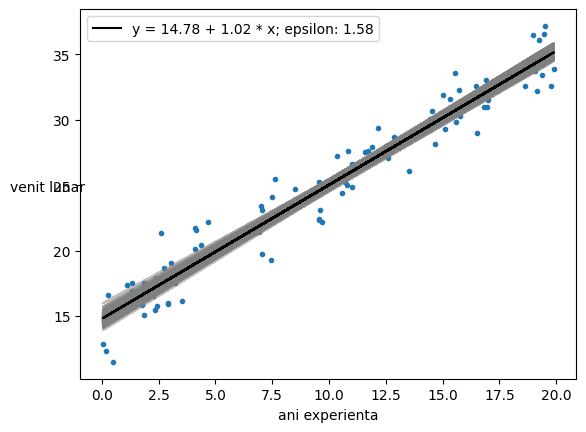

In [32]:
plt.plot(x, y, 'C0.')
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
epsilon_m = posterior_g['epsilon'].mean().item()
draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * np.array(x)[:,None], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x; epsilon: {epsilon_m:.2f}')
plt.xlabel('ani experienta')
plt.ylabel('venit lunar', rotation=0)
plt.legend()

Se observa ca media lui alfa, beta si epsilon este foarte apropiata de valorile reale utilizate